In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-analysis-uk/data.csv


# Customer lifetime value analytics 

- Data is pulled from UK Ecommerce Customer DB
- Customer segmentation - Identify elite and returning customers. Can be done using clustering / feature engineering / data visualization
- Perform statistical feature engineering to identify returnees

In [3]:
import pandas

df = pd.read_csv('/kaggle/input/e-commerce-analysis-uk/data.csv',encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Pandas functions for statistical summarisation

- info()
- describe()
- summary()
- isnull()
- sum(), min(), max()
- groupby()
- sort_values()
- shape()

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Get column data type and names info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Data preprocessing 

# Drop, fill, replace, rename

In [10]:
df.fillna({'Description':'NA' },inplace=True)
df = df.dropna(subset=['CustomerID'])
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Date time analytics

In [11]:
import datetime as dt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceTime'] = df['InvoiceDate'].dt.time
df['TotalSales'] = df['Quantity']*df['UnitPrice']
display(df.head(5))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTime,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


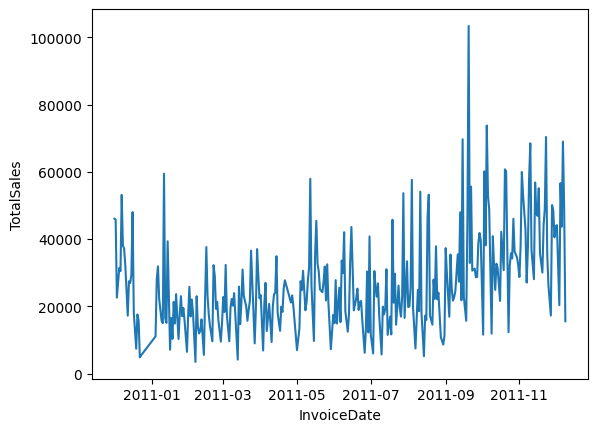

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_data = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()
# Checkout sales data 
sns.lineplot(x = 'InvoiceDate', y = 'TotalSales',data=sales_data)
plt.show()

The customer sales is highest in the 9th month. We have sales ongoing between january to October. 

In [13]:
# when was the last time as customer purchased an item ?
# Recent transaction check 
recent = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
#display(recent)
recent['Recency'] = (pd.to_datetime(pd.Timestamp.today()) - recent['InvoiceDate']).dt.days

# How frequently customer goes to shop to purchase a product ?
# Product frequency
freq = df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
#display(freq)
freq.rename(columns = {'InvoiceDate':'Frequency'},inplace=True)
#display(freq)

# What is the total amount spend by customer throught a time period?
# Cust. Monetary
monetary = df.groupby('CustomerID')['TotalSales'].sum().reset_index()
monetary.rename(columns = {'TotalSales':'Monetary'},inplace=True)
#display(monetary)

# Make a common Customer dataset with all stat cols
data = recent.merge(freq, on = 'CustomerID').merge(monetary,on = 'CustomerID')
#display(data)

# Find customer sales history 
# Lifespan of customer
cust_sales = data.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (pd.to_datetime(pd.Timestamp.today()) - x.min()).days).reset_index()
#display(cust_sales)
cust_sales.rename(columns={'InvoiceDate':'Lifespan'},inplace=True)

#Merge into cust db
data = pd.merge(data,cust_sales,on='CustomerID')

#Find average spending of each customer per day in his life
# Average daily monetary 
data['Daily_monetary'] = data['Monetary']/data['Lifespan']

# Find total customer lifetime spending value 
# That is avg spending per day in his life
# Customer lifespan value CLV
data['Clv'] = data['Daily_monetary']*data['Lifespan']
#display(data)
data.sort_values(by='Clv',ascending=False,inplace=True)


# Scaling Features

When segmenting/ clustering / representing data as groups. You should scale your data (stat metrics/ mathematical features) so that they fall in a range/ magnitude. You can perform standardisation/ minmax scaling / normalization after creating a common db.

In [14]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
f = ['Recency','Frequency','Monetary']
# scaled data would be nd array
data_scaled = s.fit_transform(data[f])



# Customer segmentation 
- Using Clustering Algos

Read about scatter plot parameter and configuring [here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


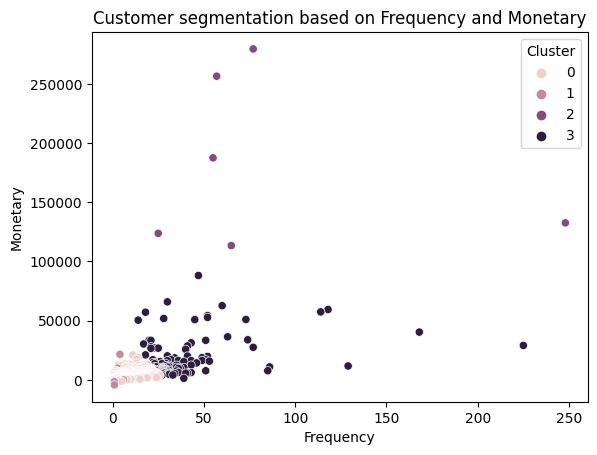

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4,random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
# Lets checkout our clusters
sns.scatterplot(data = data, x = 'Frequency',y='Monetary',hue='Cluster',legend='full')
plt.title('Customer segmentation based on Frequency and Monetary')
plt.show()

Most customers make transactions (purchasing/buying/leasing of products) between 50K to 100K in their lifetime less than 80 times in their lifespan.



### What would be the average revenue spend by customers?

In [16]:
# Unit Price * Quanitity = Revenue for each customer
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceTime,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34


In [17]:
# Merged DB
data.head(5)

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Lifespan,Daily_monetary,Clv,Cluster
1703,14646.0,2011-12-08 12:12:00,4570,77,279489.02,4570,61.157335,279489.02,2
4233,18102.0,2011-12-09 11:50:00,4569,57,256438.49,4569,56.125736,256438.49,2
3758,17450.0,2011-12-01 13:29:00,4577,55,187482.17,4577,40.961802,187482.17,2
1895,14911.0,2011-12-08 15:54:00,4570,248,132572.62,4570,29.009326,132572.62,2
55,12415.0,2011-11-15 14:22:00,4593,25,123725.45,4593,26.937829,123725.45,2


In [18]:
df['Revenue']=df['UnitPrice']*df['Quantity']
revdata = df.groupby('CustomerID')['Revenue'].sum().reset_index()
#revdata.head()
data =pd.merge(data,revdata,on='CustomerID')
data.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Lifespan,Daily_monetary,Clv,Cluster,Revenue
0,14646.0,2011-12-08 12:12:00,4570,77,279489.02,4570,61.157335,279489.02,2,279489.02
1,18102.0,2011-12-09 11:50:00,4569,57,256438.49,4569,56.125736,256438.49,2,256438.49
2,17450.0,2011-12-01 13:29:00,4577,55,187482.17,4577,40.961802,187482.17,2,187482.17
3,14911.0,2011-12-08 15:54:00,4570,248,132572.62,4570,29.009326,132572.62,2,132572.62
4,12415.0,2011-11-15 14:22:00,4593,25,123725.45,4593,26.937829,123725.45,2,123725.45


In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Plot revenue as histogram

import plotly.express as px
import plotly.offline as pyoff

d = data['Revenue']
fig = px.histogram(d,x='Revenue',histfunc='sum',
                   text_auto=True,nbins=10,title='Customer revenue distribution')
fig.show()



Histogram is showing negative customer life time value(LTV). We have some outliers too. We should filter the outliers and remerge the data to see correlations between the feature set and LTV

The Max Revenue is ending at 50K

In [23]:
data2 = pd.merge(data[data['Revenue'] < 50000],revdata,on='CustomerID',how='left')
data2.fillna(0,inplace=True)

d = data2['Revenue_x']
fig = px.histogram(d,x='Revenue_x',histfunc='sum',
                   text_auto=True,nbins=10,title='Customer revenue distribution')
fig.show()

# References

1. https://www.kaggle.com/code/annsanababy/customer-segmentation-and-lifetime-value-analysis
2. 
https://www.kaggle.com/code/shailaja4247/customer-lifetime-value-prediction/notebook
3. https://www.kaggle.com/code/amirmotefaker/customer-lifetime-value-analysis/notebook